In [1]:
import sympy


In [2]:
x, m1, m2, cp1, cp2, U, A, l, T10, T2l = sympy.symbols(
    r"x \dot{m}_1 \dot{m}_2 c_p\,1 c_p\,2 U A l T_{1\,0} T_{2\,l}"
)

T1, T2, DT = sympy.symbols(r"T_1 T_2 \Delta\ T", cls=sympy.Function)

dT1 = T1(x).diff(x)
dT2 = T2(x).diff(x)
dDT = DT(x).diff(x)

We're dealing with an open system and are looking for a stationary solution. Assuming $T_2$ has its inlet at $x=l$, $T_1$ its inlet at $x=0$ and $T_2(x) > T_1(x)$ everywhere we have:

In [3]:
dx = sympy.symbols(r"\mathrm{d}x")

sympy.limit(
    m1 * cp1 * (T1(x + dx) - T1(x)) / dx + m2 * cp2 * (T2(x - dx) - T2(x)) / dx, dx, 0
)

\dot{m}_1*c_p,1*Subs(Derivative(T_1(_xi_1), _xi_1), _xi_1, x) - \dot{m}_2*c_p,2*Subs(Derivative(T_2(_xi_1), _xi_1), _xi_1, x)

In [4]:
du1 = m1 * cp1 * dT1
du2 = m2 * cp2 * dT2
dq = U * (A / l) * (T2(x) - T1(x))

en_eq1 = sympy.Eq(du1, dq)
en_eq2 = sympy.Eq(-dq, du2)

display(en_eq1, en_eq2)

Eq(\dot{m}_1*c_p,1*Derivative(T_1(x), x), A*U*(-T_1(x) + T_2(x))/l)

Eq(-A*U*(-T_1(x) + T_2(x))/l, \dot{m}_2*c_p,2*Derivative(T_2(x), x))

With boundary conditions

In [5]:
bc1_eq = sympy.Eq(T1(0), T10)
bc2_eq = sympy.Eq(T2(l), T2l)
display(bc1_eq, bc2_eq)

Eq(T_1(0), T_{1,0})

Eq(T_2(l), T_{2,l})

In [6]:
T1_eq, T2_eq = sympy.dsolve(
    [en_eq1, en_eq2],
    [T1(x), T2(x)],
    ics={bc1_eq.lhs: bc1_eq.rhs, bc2_eq.lhs: bc2_eq.rhs},
)

T1_eq = T1_eq.simplify()
T2_eq = T2_eq.simplify()

display(T1_eq, T2_eq)


Eq(T_1(x), (\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(\dot{m}_2*c_p,2*(T_{1,0} - T_{2,l})*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*exp(A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l)))*exp(-A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))**2)

Eq(T_2(x), (\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(\dot{m}_1*c_p,1*(-T_{1,0} + T_{2,l})*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*exp(A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l)))*exp(-A*U*x*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*l))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))**2)

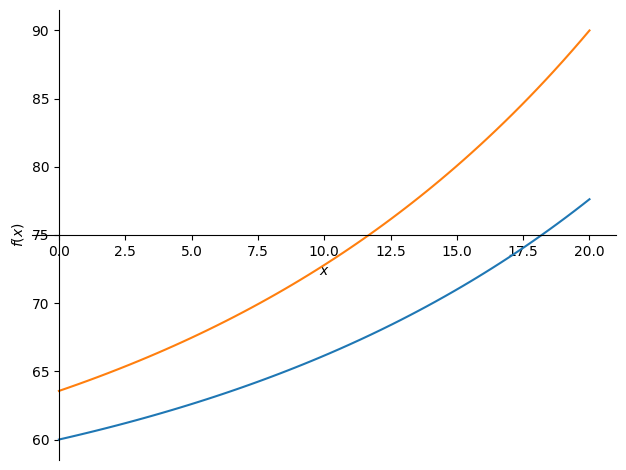

In [7]:
subs = {
    m1: 1.5 * 0.16,
    m2: -0.16,
    cp1: 4184,
    cp2: 4184,
    l: 20,
    A: 5,
    U: 500,
    T10: 60,
    T2l: 90,
}

sympy.plot(T1_eq.rhs.subs(subs), T2_eq.rhs.subs(subs), (x, 0, subs[l]))

Assuming $T_{1,0}$, $T_{2,l}$ and $\dot{m}_2$ are fixed what is the mass flow $\dot{m}_1$ which maximizes the transfered energy?

First, solve for the mass flows:

In [8]:
dT1 = (T1_eq.rhs.subs({x: l})-T10).simplify()
dT1

\dot{m}_2*c_p,2*(-T_{1,0}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) + T_{1,0} + T_{2,l}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) - T_{2,l})/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))

In [9]:
E = (m1*cp1*dT1).simplify()
E

\dot{m}_1*\dot{m}_2*c_p,1*c_p,2*(-T_{1,0}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) + T_{1,0} + T_{2,l}*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) - T_{2,l})/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)))

In [31]:
Emax = sympy.limit(E, m1, sympy.oo).simplify()
Emax

\dot{m}_2*c_p,2*(1 - exp(A*U/(\dot{m}_2*c_p,2)))*(T_{1,0} - T_{2,l})

In [43]:
subs2 = subs.copy()
del subs2[m1]
-100*subs2[m2]

16.0

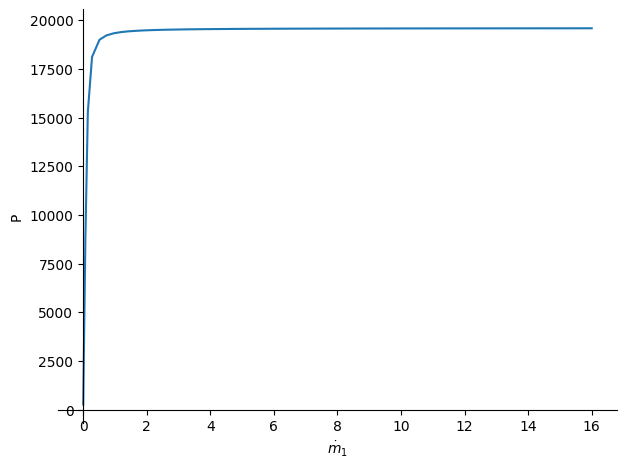

In [44]:
sympy.plot(
    E.subs(subs2),
    (m1, 0, 100 * -subs2[m2]),
    xlabel=r"$\dot{m}_1$",
    ylabel=r"P",
)

In [45]:
mrel = sympy.Symbol(r"\tilde{m}")
Emrel = E.subs({m1: mrel*-m2}).simplify()
Emrel

-\dot{m}_2*\tilde{m}*c_p,1*c_p,2*(T_{1,0}*exp(A*U*(\tilde{m}*c_p,1 - c_p,2)/(\dot{m}_2*\tilde{m}*c_p,1*c_p,2)) - T_{1,0} - T_{2,l}*exp(A*U*(\tilde{m}*c_p,1 - c_p,2)/(\dot{m}_2*\tilde{m}*c_p,1*c_p,2)) + T_{2,l})/(\tilde{m}*c_p,1 - c_p,2*exp(A*U*(\tilde{m}*c_p,1 - c_p,2)/(\dot{m}_2*\tilde{m}*c_p,1*c_p,2)))

In [46]:
subs2

{\dot{m}_2: -0.16,
 c_p,1: 4184,
 c_p,2: 4184,
 l: 20,
 A: 5,
 U: 500,
 T_{1,0}: 60,
 T_{2,l}: 90}

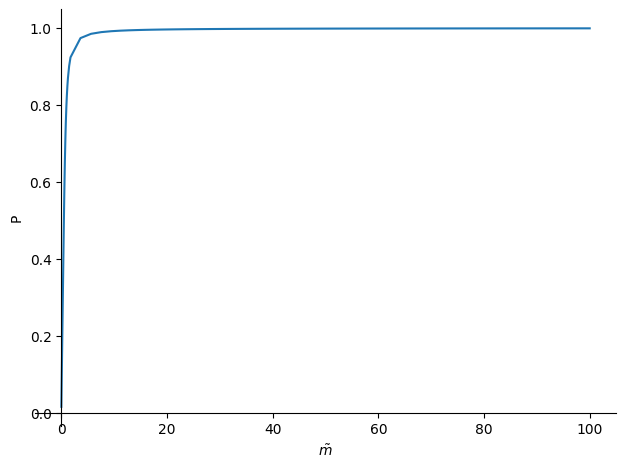

In [74]:
sympy.plot(
    Emrel.subs(subs2)/Emax.subs(subs2),
    (mrel, 0, 100),
    xlabel=r"$\tilde{m}$",
    ylabel=r"P",
)

<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in multiply
<string>:1: RuntimeWarning: invalid value encountered in scalar divide


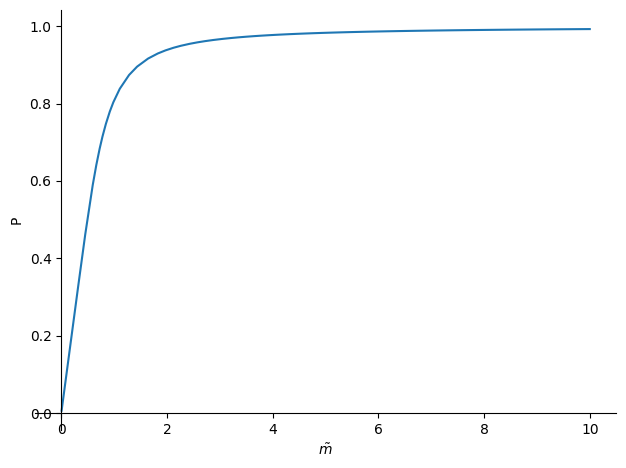

In [75]:
sympy.plot(
    Emrel.subs(subs2)/Emax.subs(subs2),
    (mrel, 0, 10),
    xlabel=r"$\tilde{m}$",
    ylabel=r"P",
)

In [60]:
Emax.subs(subs2).simplify()

19603.4935777336

In [76]:
Emrel.subs(subs2).evalf(subs={mrel: 2})/Emax.subs(subs2)

0.938674136250920

In [61]:
E.subs(subs2).simplify()

\dot{m}_1*(84028108.8 - 2007091.67076248*exp(625/(1046*\dot{m}_1)))/(4184.0*\dot{m}_1 - 15.9902140755456*exp(625/(1046*\dot{m}_1)))

In [73]:
m1_99 = sympy.nsolve(0.90*Emax.subs(subs2)-E.subs(subs2), -subs2[m2])
mrel99 = m1_99/-subs2[m2]
mrel99

1.47486085199031

We want to look at the influcence of $T_{2,l}$ and $\dot{m}_2$ on $T_{1,l}$.

In [16]:
T1l = T1_eq.rhs.subs({x: l}).simplify()
T1l_eq = sympy.Eq(T1(l), T1l)
T1l_eq


Eq(T_1(l), (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} - T_{2,l}))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2))))

In [17]:
for i in range(1, 3):
    display(sympy.Eq(T1(T2l).diff(T2l, i), sympy.diff(T1l, T2l, i).simplify()))

Eq(Derivative(T_1(T_{2,l}), T_{2,l}), \dot{m}_2*c_p,2*(exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1)) - 1)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U/(\dot{m}_2*c_p,2) + A*U/(\dot{m}_1*c_p,1))))

Eq(Derivative(T_1(T_{2,l}), (T_{2,l}, 2)), 0)

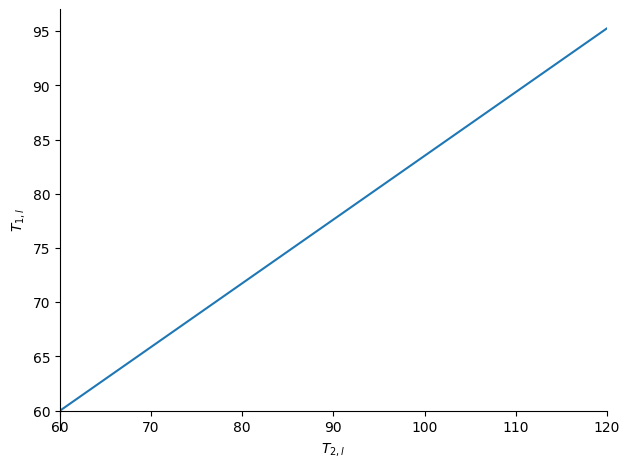

In [18]:
subs2 = subs.copy()
del subs2[T2l]

sympy.plot(
    T1_eq.rhs.subs(subs2 | {x: subs2[l]}),
    (T2l, subs2[T10], 2 * subs2[T10]),
    xlabel="$T_{2,l}$",
    ylabel="$T_{1,l}$",
    axis_center=(subs2[T10], 60),
    xlim=[subs2[T10], 2 * subs2[T10]],
)

In [19]:
for i in range(1, 3):
    display(sympy.Eq(T1(m2).diff(m2, i), sympy.diff(T1l, m2, i).simplify()))


Eq(Derivative(T_1(\dot{m}_2), \dot{m}_2), (-(-A*U + \dot{m}_2*c_p,2)*(T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} - T_{2,l}))*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + (\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(-A*T_{2,l}*U*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} + T_{2,l}*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) - T_{2,l})))/(\dot{m}_2*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))**2))

Eq(Derivative(T_1(\dot{m}_2), (\dot{m}_2, 2)), (A**2*T_{2,l}*U**2*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))**2 - 2*\dot{m}_2*c_p,2*(-A*U + \dot{m}_2*c_p,2)*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(-A*T_{2,l}*U*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} + T_{2,l}*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) - T_{2,l})) - (A**2*U**2*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2))) - 2*\dot{m}_2*c_p,2*(-A*U + \dot{m}_2*c_p,2)**2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)))*(T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} - T_{2,l})))*exp(A*U*(

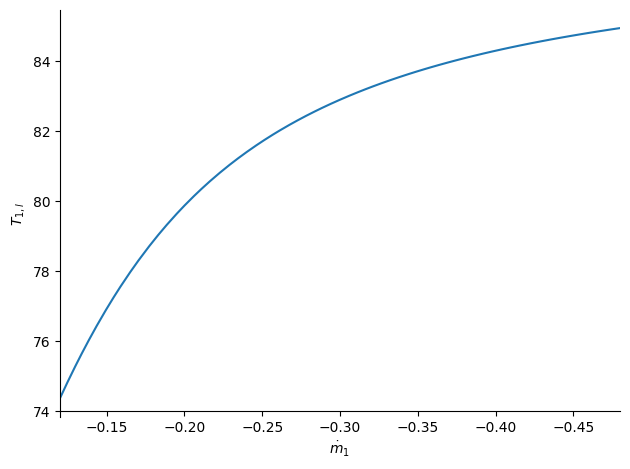

In [20]:
subs2 = subs.copy()
del subs2[m2]

sympy.plot(
    T1_eq.rhs.subs(subs2 | {x: subs2[l]}),
    (m2, -0.5 * subs2[m1], -2 * subs2[m1]),
    xlabel="$\dot{m}_1$",
    ylabel="$T_{1,l}$",
    axis_center=(-0.5 * subs2[m1], 74),
    xlim=[-0.5 * subs2[m1], -2 * subs2[m1]],
)

How much do we need to increase the mass flow $\dot{m}_2$ to $\dot{m}'_2 = f_m \dot{m}_2$ to get the same increase in $T_{1,l}$ as for increasing $T_{2,l}$ to $T'_{2,l} = f_T T_{2,l}$?

In [21]:
fm, fT = sympy.symbols("f_m f_T")
eq = sympy.Eq(T1l.subs({m2: fm*m2}).simplify(), T1l.subs({T2l: fT*T2l}).simplify())
eq

Eq((T_{1,0}*\dot{m}_1*c_p,1 + T_{1,0}*\dot{m}_2*c_p,2*f_m + T_{2,l}*\dot{m}_2*c_p,2*f_m*exp(A*U/(\dot{m}_2*c_p,2*f_m) + A*U/(\dot{m}_1*c_p,1)) - T_{2,l}*\dot{m}_2*c_p,2*f_m)/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*f_m*exp(A*U/(\dot{m}_2*c_p,2*f_m) + A*U/(\dot{m}_1*c_p,1))), (T_{1,0}*\dot{m}_1*c_p,1 + T_{2,l}*\dot{m}_2*c_p,2*f_T*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2)) + \dot{m}_2*c_p,2*(T_{1,0} - T_{2,l}*f_T))/(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2*exp(A*U*(\dot{m}_1*c_p,1 + \dot{m}_2*c_p,2)/(\dot{m}_1*\dot{m}_2*c_p,1*c_p,2))))

In [22]:
sol = sympy.solve(eq, fT)[0].simplify()
sol

(-T_{1,0}*\dot{m}_1*c_p,1*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2*f_m) + 1/(\dot{m}_1*c_p,1))) + T_{1,0}*\dot{m}_1*c_p,1*f_m + T_{1,0}*\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) - T_{1,0}*\dot{m}_1*c_p,1 + T_{1,0}*\dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) - T_{1,0}*\dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2*f_m) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_1*c_p,1*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2*f_m) + 1/(\dot{m}_1*c_p,1))) - T_{2,l}*\dot{m}_1*c_p,1*f_m - T_{2,l}*\dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) + T_{2,l}*\dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_2*c_p,2*f_m) + 2/(\dot{m}_1*c_p,1))))/(T_{2,l}*(\dot{m}_1*c_p,1*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_1*c_p,1))) - \dot{m}_1*c_p,1 - \dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2*f_m) + 1/(\dot{m}_1*c_p,1))) + \dot{m}_2*c_p,2*f_m*exp(A*U*(1/(\dot{m}_2*c_p,2) + 1/(\dot{m}_2*c_p,2*f_m) + 2/(\dot{m}_1*c_p,1)))))

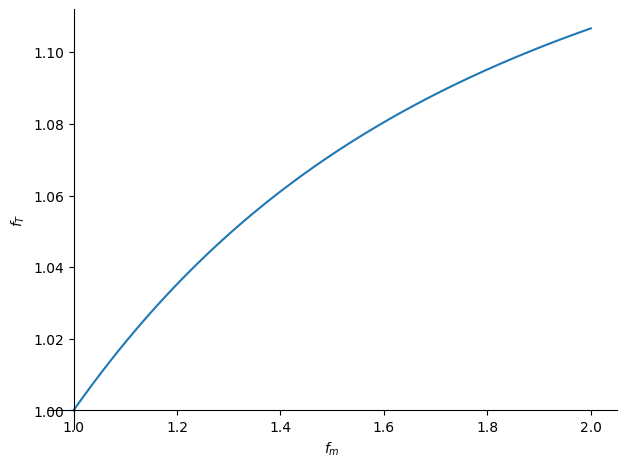

In [23]:
sympy.plot(
    sol.subs(subs),
    (fm, 1, 2),
    xlabel="$f_m$",
    ylabel="$f_T$",
    axis_center=(1.0, 1.0),
)

Read: increasing the hot side inflow temperature by just 8 per cent will increase the cold side outflow temperature by as much as increasing the hot side mass flow by 60 per cent.